epoch:  0 loss:  0.23210401833057404
epoch:  1 loss:  0.23201021552085876
epoch:  2 loss:  0.23191651701927185
epoch:  3 loss:  0.2318229377269745
epoch:  4 loss:  0.2317294329404831
epoch:  5 loss:  0.23163607716560364
epoch:  6 loss:  0.23154275119304657
epoch:  7 loss:  0.23144957423210144
epoch:  8 loss:  0.23135647177696228
epoch:  9 loss:  0.23126351833343506
epoch:  10 loss:  0.23117060959339142
epoch:  11 loss:  0.23107783496379852
epoch:  12 loss:  0.23098516464233398
epoch:  13 loss:  0.2308925837278366
epoch:  14 loss:  0.230800062417984
epoch:  15 loss:  0.23070769011974335
epoch:  16 loss:  0.23061537742614746
epoch:  17 loss:  0.23052318394184113
epoch:  18 loss:  0.23043107986450195
epoch:  19 loss:  0.23033905029296875
epoch:  20 loss:  0.2302471101284027
epoch:  21 loss:  0.23015527427196503
epoch:  22 loss:  0.23006358742713928
epoch:  23 loss:  0.22997191548347473
epoch:  24 loss:  0.22988036274909973
epoch:  25 loss:  0.2297888994216919
epoch:  26 loss:  0.229697465

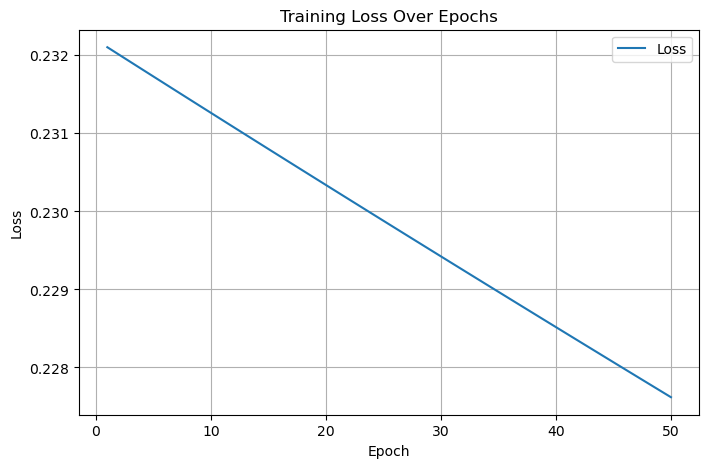

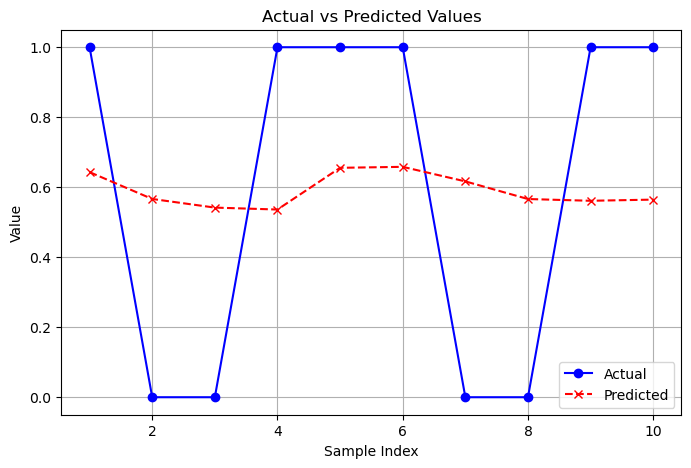

In [8]:
# 导入PyTorch库
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 定义输入层大小、隐藏层大小、输出层大小和批量大小
#在深度学习中，批量大小（Batch Size） 是指每次前向传播（Forward Pass）和反向传播（Backward Pass）时，模型同时处理的样本数量。
n_in, n_h, n_out, batch_size = 10, 5, 1, 10

# 创建虚拟输入数据和目标数据
x = torch.randn(batch_size, n_in)  # 随机生成输入数据
y = torch.tensor([[1.0], [0.0], [0.0], 
                 [1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0]])  # 目标输出数据

# 创建顺序模型，包含线性层、ReLU激活函数和Sigmoid激活函数
model = nn.Sequential(#按顺序堆叠层，无需手动定义 forward 方法。
   nn.Linear(n_in, n_h),  # 输入层到隐藏层的线性变换
   nn.ReLU(),            # 隐藏层的ReLU激活函数
   nn.Linear(n_h, n_out),  # 隐藏层到输出层的线性变换
   nn.Sigmoid()           # 输出层的Sigmoid激活函数
)

# 定义均方误差损失函数和随机梯度下降优化器
criterion = torch.nn.MSELoss()  # 替代 MSELoss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # 学习率为0.01

# 用于存储每轮的损失值
losses = []

# 执行梯度下降算法进行模型训练
for epoch in range(50):  # 迭代50次
   y_pred = model(x)  # 前向传播，计算预测值
   loss = criterion(y_pred, y)  # 计算损失
   losses.append(loss.item())  # 记录损失值
   print('epoch: ', epoch, 'loss: ', loss.item())  # 打印损失值

   optimizer.zero_grad()  # 清零梯度
   loss.backward()  # 反向传播，计算梯度
   optimizer.step()  # 更新模型参数

# 可视化损失变化曲线
plt.figure(figsize=(8, 5))
plt.plot(range(1, 51), losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()

# 可视化预测结果与实际目标值对比
y_pred_final = model(x).detach().numpy()  # 最终预测值
y_actual = y.numpy()  # 实际值

plt.figure(figsize=(8, 5))
plt.plot(range(1, batch_size + 1), y_actual, 'o-', label='Actual', color='blue')
plt.plot(range(1, batch_size + 1), y_pred_final, 'x--', label='Predicted', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid()
plt.show()

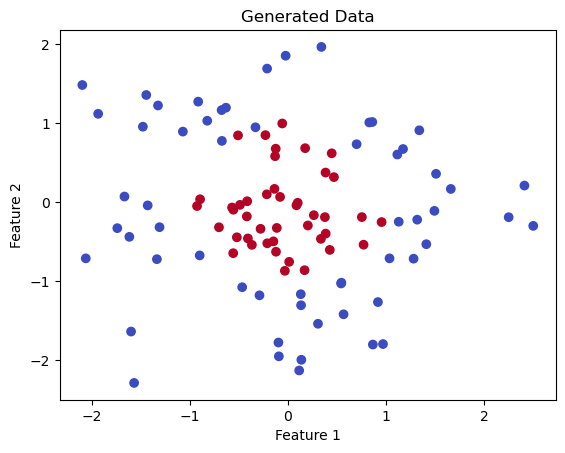

Epoch [10/100], Loss: 0.6915
Epoch [20/100], Loss: 0.6698
Epoch [30/100], Loss: 0.6563
Epoch [40/100], Loss: 0.6458
Epoch [50/100], Loss: 0.6372
Epoch [60/100], Loss: 0.6297
Epoch [70/100], Loss: 0.6234
Epoch [80/100], Loss: 0.6172
Epoch [90/100], Loss: 0.6110
Epoch [100/100], Loss: 0.6047


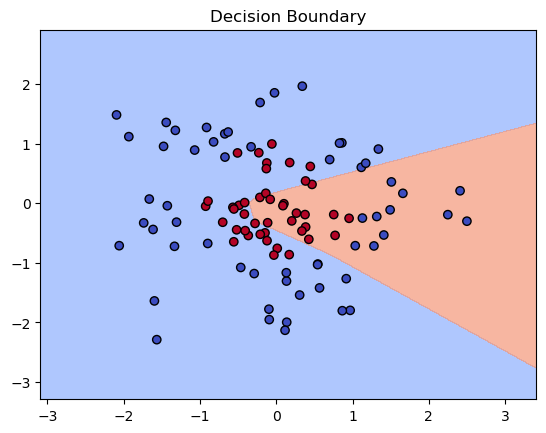

In [11]:
#第二个示例
#首先先生成一些二维数据
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 生成一些随机数据
n_samples = 100
data = torch.randn(n_samples, 2)  # 生成 100 个二维数据点
labels = (data[:, 0]**2 + data[:, 1]**2 < 1).float().unsqueeze(1)  # 点在圆内为1，圆外为0

# 可视化数据
plt.scatter(data[:, 0], data[:, 1], c=labels.squeeze(), cmap='coolwarm')
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

'''
data 是输入的二维点，每个点有两个特征。
labels 是目标分类，点在圆形区域内为 1，否则为 0。
'''
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # 定义神经网络的层
        self.fc1 = nn.Linear(2, 4)  # 输入层有 2 个特征，隐藏层有 4 个神经元
        self.fc2 = nn.Linear(4, 1)  # 隐藏层输出到 1 个神经元（用于二分类）
        self.sigmoid = nn.Sigmoid()  # 二分类激活函数

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # 使用 ReLU 激活函数
        x = self.sigmoid(self.fc2(x))  # 输出层使用 Sigmoid 激活函数
        return x

# 实例化模型
model = SimpleNN()

# 定义二分类的损失函数和优化器
criterion = nn.BCELoss()  # 二元交叉熵损失
optimizer = optim.SGD(model.parameters(), lr=0.1)  # 使用随机梯度下降优化器

# 训练
epochs = 100
for epoch in range(epochs):
    # 前向传播
    outputs = model(data)
    loss = criterion(outputs, labels)

    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 每 10 轮打印一次损失
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')
    
    # 可视化决策边界
def plot_decision_boundary(model, data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.1), torch.arange(y_min, y_max, 0.1), indexing='ij')
    grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
    predictions = model(grid).detach().numpy().reshape(xx.shape)
    plt.contourf(xx, yy, predictions, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.7)
    plt.scatter(data[:, 0], data[:, 1], c=labels.squeeze(), cmap='coolwarm', edgecolors='k')
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(model, data)